# Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


# Load the dataset

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data.shape

(200, 5)

# Plot the relationship between the features and the target variable

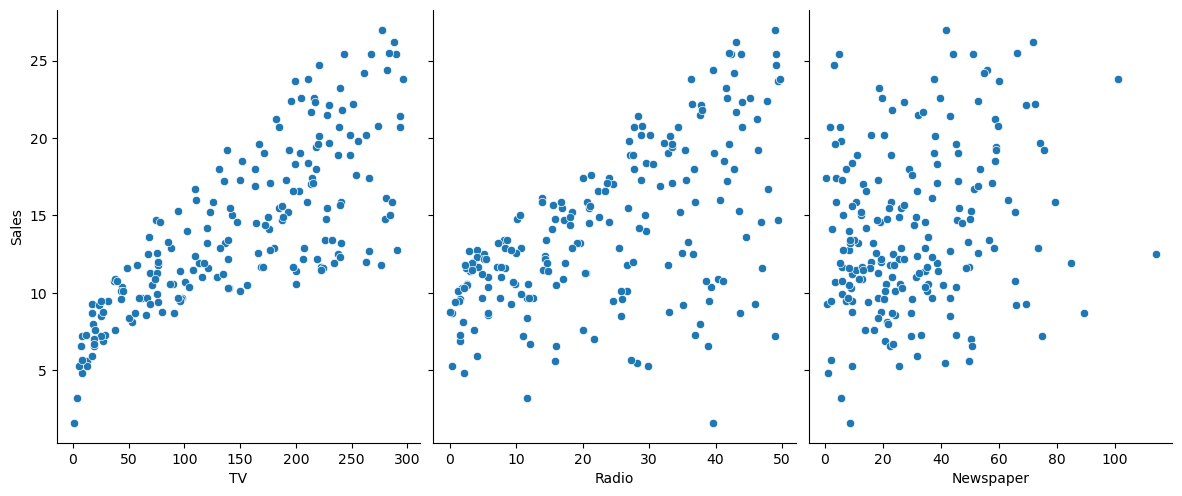

In [9]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

# Split the data into features (X) and target (y)

In [10]:
X = data.drop('Sales', axis=1)
y = data['Sales']

In [11]:
print(X)

     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [13]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


# Scale the features using StandardScaler

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
print(X)

[[-1.72341210e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.70609137e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.68877065e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [-1.67144992e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [-1.65412920e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.63680847e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.61948775e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-1.60216702e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.58484630e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [-1.56752558e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-1.55020485e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [-1.53288413e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.51556340e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-1.49824268e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [-1.48092195e+00  6.66253447e-01  6.50657027e-01  7.11007392e

# Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the performance of the model on the testing set

In [18]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.8986489151417081


# Make predictions on new data

In [22]:
import numpy as np

new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [100],
    'Newspaper': [50],
    'Sales': [0]  # unknown, set to 0
})
new_data_scaled = scaler.transform(new_data)
new_sales = model.predict(new_data_scaled)
print('Predicted sales:', np.round(new_sales[0], 2))

Predicted sales: 16.97
